In [1]:
import cv2
import matplotlib.pyplot as plt
import glob
import os
import numpy as np
from scipy.cluster.vq import kmeans, vq
from numpy.linalg import norm

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
photos=[]

for fil in glob.glob('./images/*.JPG'):
    image = cv2.imread(fil)
    image = cv2.resize(image, [640,480]) 
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    photos.append(gray_image)

Premature end of JPEG file


In [3]:
print(len(photos))

4323


In [4]:
print(photos[1000].shape)

(480, 640)


SIFT

In [5]:
extractor = cv2.SIFT_create()

keypoints = []
descriptors = []

for img in photos:
    # extract keypoints and descriptors for each image
    img_keypoints, img_descriptors = extractor.detectAndCompute(img, None)
    keypoints.append(img_keypoints)
    descriptors.append(img_descriptors)

In [6]:
print(len(keypoints), len(descriptors))

4323 4323


In [ ]:
print(descriptors[50].shape)

(480, 128)


In [6]:
print(f"len before: {len(descriptors)}")

to_drop = []
for i, img_descriptors in enumerate(descriptors):
    if img_descriptors is None:
        to_drop.append(i)
print(f"indexes: {to_drop}")

for i in sorted(to_drop, reverse=True):
    del descriptors[i], keypoints[i]

print(f"len after: {len(descriptors)}")

len before: 4323
indexes: [29, 36, 70, 165, 282, 432, 462, 582, 723, 841, 851, 860, 931, 1170, 1300, 1369, 1384, 1820, 1874, 1903, 1978, 2063, 2095, 2132, 2148, 2200, 2337, 2343, 2371, 2564, 2574, 2740, 2768, 3007, 3269, 3358, 3429, 3473, 3511, 3516, 3541, 3660, 3783, 3823, 3877, 3903, 4098, 4137]
len after: 4275


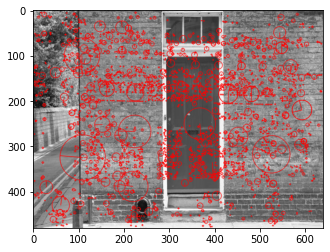

In [12]:
plt.imshow(cv2.drawKeypoints(photos[1000], keypoints[50], 0, (255, 0, 0),
                                 flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS))

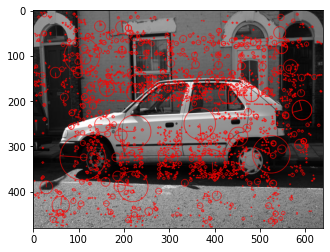

In [13]:
plt.imshow(cv2.drawKeypoints(photos[2000], keypoints[50], 0, (255, 0, 0),
                                 flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS))

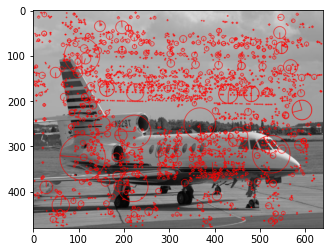

In [14]:
plt.imshow(cv2.drawKeypoints(photos[4000], keypoints[50], 0, (255, 0, 0),
                                 flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS))

In [7]:
np.random.seed(0)
# select 1000 random image index values
sample_idx = np.random.randint(0, len(descriptors)+1, 2000).tolist()
len(sample_idx)

2000

In [9]:
print(len(descriptors),len(photos))

4275 4323


In [16]:
descriptors_sample = []
for n in sample_idx:
    descriptors_sample.append(np.array(descriptors[n]))

In [ ]:
len(descriptors_sample[0])

655

In [17]:
all_descriptors = []
for img_descriptors in descriptors_sample:
    for descriptor in img_descriptors:
        all_descriptors.append(descriptor)
all_descriptors = np.stack(all_descriptors)

all_descriptors.shape

(3598408, 128)

In [15]:
all_descriptors[0].shape

(128,)

In [18]:
count = []
for img_descriptors in descriptors_sample:
    count.append(len(img_descriptors))
# here we can see the number of descriptors for the first five images
print(f"first five: {count[:5]}")
# and if we sum them all, we should see the 39893 from before
print(f"count all: {sum(count)}")

first five: [37, 67, 553, 2006, 2717]
count all: 3598408


In [ ]:
k = 150
iters = 1
codebook, variance = kmeans(all_descriptors, k, iters)

In [18]:
visual_words = []
for img_descriptors in descriptors:
    img_visual_words, distance = vq(img_descriptors, codebook)
    visual_words.append(img_visual_words)

visual_words[0][:5], len(visual_words[0])

(array([98, 17, 48, 42, 92], dtype=int32), 928)

In [19]:
frequency_vectors = []
for img_visual_words in visual_words:
    img_frequency_vector = np.zeros(k)
    for word in img_visual_words:
        img_frequency_vector[word] += 1
    frequency_vectors.append(img_frequency_vector)
frequency_vectors = np.stack(frequency_vectors)
frequency_vectors.shape

(4275, 100)

In [20]:
for i in visual_words[0]:
    print(f"{i}: {frequency_vectors[0][i]}")

98: 30.0
17: 19.0
48: 30.0
42: 6.0
92: 55.0
73: 34.0
43: 33.0
50: 5.0
97: 10.0
97: 10.0
72: 12.0
27: 10.0
98: 30.0
46: 30.0
36: 7.0
13: 6.0
98: 30.0
73: 34.0
3: 21.0
48: 30.0
73: 34.0
0: 4.0
36: 7.0
88: 7.0
8: 6.0
38: 4.0
73: 34.0
98: 30.0
60: 5.0
25: 10.0
0: 4.0
61: 6.0
25: 10.0
44: 25.0
77: 4.0
58: 6.0
49: 5.0
94: 9.0
81: 7.0
70: 7.0
72: 12.0
81: 7.0
90: 9.0
40: 3.0
43: 33.0
44: 25.0
59: 3.0
61: 6.0
37: 7.0
41: 5.0
10: 8.0
79: 10.0
37: 7.0
97: 10.0
97: 10.0
32: 9.0
20: 7.0
73: 34.0
82: 8.0
6: 8.0
3: 21.0
9: 25.0
18: 4.0
31: 5.0
47: 5.0
87: 7.0
10: 8.0
37: 7.0
96: 7.0
70: 7.0
62: 3.0
23: 8.0
37: 7.0
9: 25.0
22: 8.0
2: 6.0
43: 33.0
96: 7.0
46: 30.0
46: 30.0
32: 9.0
20: 7.0
46: 30.0
7: 3.0
46: 30.0
70: 7.0
56: 5.0
9: 25.0
60: 5.0
60: 5.0
20: 7.0
18: 4.0
37: 7.0
46: 30.0
93: 2.0
11: 6.0
45: 50.0
17: 19.0
48: 30.0
58: 6.0
13: 6.0
58: 6.0
72: 12.0
22: 8.0
75: 8.0
55: 4.0
89: 4.0
48: 30.0
25: 10.0
20: 7.0
85: 4.0
4: 4.0
93: 2.0
2: 6.0
22: 8.0
83: 3.0
29: 6.0
65: 9.0
83: 3.0
48: 30.0
22: 8.0

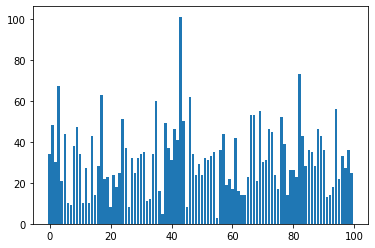

In [21]:
plt.bar(list(range(k)), frequency_vectors[1000])
plt.show()

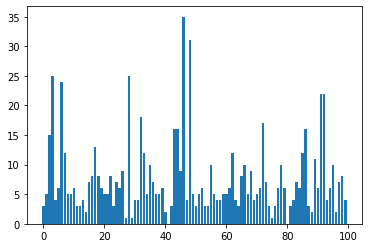

In [22]:
plt.bar(list(range(k)), frequency_vectors[4000])
plt.show()

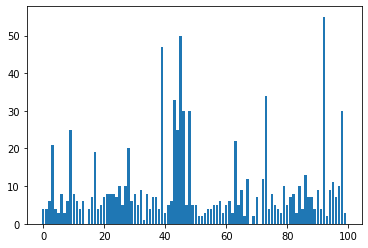

In [23]:
plt.bar(list(range(k)), frequency_vectors[0])
plt.show()

TF-IDF

In [24]:
N = 4090 
df = np.sum(frequency_vectors > 0, axis=0)
df.shape, df[:5]

((100,), array([3709, 3688, 3949, 3697, 3710]))

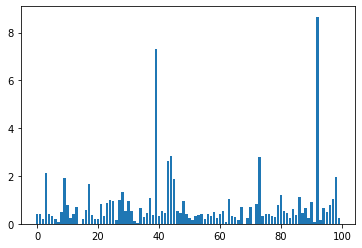

In [25]:
idf = np.log(N/ df)
tfidf = frequency_vectors * idf


plt.bar(list(range(k)), tfidf[0])
plt.show()

In [57]:
a = tfidf[500]
b = tfidf

cosine_similarity = np.dot(a, b.T)/(norm(a) * norm(b, axis=1))
print("Min cosine similarity:", round(np.min(cosine_similarity),1))
print("Max cosine similarity:", np.max(cosine_similarity))

Min cosine similarity: 0.0
Max cosine similarity: 1.0


In [58]:
top_k = 5
idx = np.argsort(-cosine_similarity)[:top_k]
idx

array([500, 547, 497, 541, 501])

500: 1.0


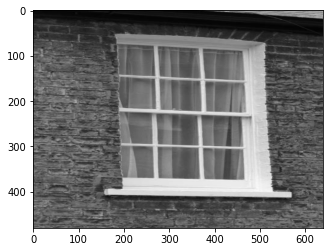

547: 0.948


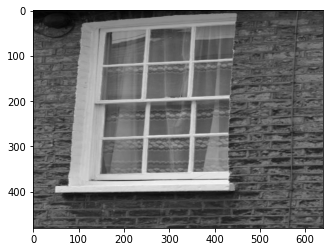

497: 0.9432


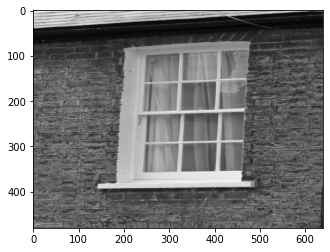

541: 0.9243


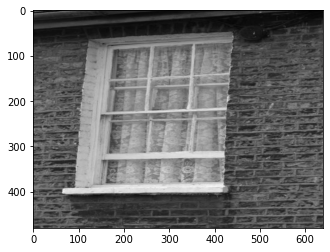

501: 0.922


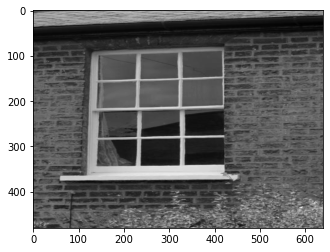

In [59]:
for i in idx:
    print(f"{i}: {round(cosine_similarity[i], 4)}")
    plt.imshow(photos[i], cmap='gray')
    plt.show()

In [33]:
colorfull_photos=[]
for fil in glob.glob("/content/drive/MyDrive/images/images/*.JPG"):
    image = cv2.imread(fil) 
    image = cv2.resize(image, [640,480]) 
    colorfull_photos.append(image)

In [ ]:
for i in idx:
    print(f"{i}: {round(cosine_similarity[i], 5)}")
    plt.imshow(colorfull_photos[i], cmap='gray')
    plt.show()